In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances , linear_kernel
from sklearn.model_selection import train_test_split
import pickle

In [2]:
df = pd.read_csv('all-places.csv')

In [3]:
def background_color(value):
    if isinstance(value, str):
        return 'background-color: #40A2E3'
    return ''

def show_df(df):   #function to show information about data
    
    print('shape'.center(30,'_'))
    display(df.shape)
    
    print('head'.center(30,'_'))
    display(df.head())
    
    print('tail'.center(30,'_'))
    display(df.tail())
    
    print('info'.center(30,'_')+'\n')
    display(df.info())
    
    print('describe'.center(30,'_'))
    display(df.describe().T)
  
show_df(df)

____________shape_____________


(310, 6)

_____________head_____________


,state_id,address,name,description,image,image2
0,1,Alexandria,bibliotheca Alexandrina,The Library of Alexandria was for many centuri...,https://www.cairotoptours.com/storage/256/conv...,https://www.cairotoptours.com/storage/255/conv...
1,1,Alexandria,Alexandria National Museum,The National Museum of Alexandria has grown in...,https://www.cairotoptours.com/storage/265/conv...,https://www.cairotoptours.com/storage/264/conv...
2,1,Alexandria,The Citadel of Qaitbey,The citadel of Qaitbay in Alexandria is consid...,https://www.cairotoptours.com/storage/273/conv...,https://www.cairotoptours.com/storage/272/conv...
3,1,Alexandria,Alexandria Corniche,Alexandria Corniche is a very important Alexan...,https://www.cairotoptours.com/storage/283/conv...,https://www.cairotoptours.com/storage/282/conv...
4,1,Alexandria,The Roman Amphitheatre in Alexandria | Ancient...,The Roman amphitheater in Alexandria in Egypt ...,https://www.cairotoptours.com/storage/291/conv...,https://www.cairotoptours.com/storage/290/conv...


_____________tail_____________


,state_id,address,name,description,image,image2
305,5,Red Sea,Mini Egypt Park,Mini Egypt Park is a miniature park that exten...,https://www.cairotoptours.com/storage/4046/con...,https://www.cairotoptours.com/storage/4045/con...
306,5,Red Sea,Abu Minkar Island,"Abu Minqar Islands are islands in the Red Sea,...",https://www.cairotoptours.com/storage/4055/con...,https://www.cairotoptours.com/storage/4054/con...
307,5,Red Sea,Magawish Island,Magawish Island is one of the largest islands ...,https://www.cairotoptours.com/storage/4062/con...,https://www.cairotoptours.com/storage/4061/con...
308,5,Red Sea,Hurghada Grand Aquarium,The Aquarium contains 22 fish tanks and contai...,https://www.cairotoptours.com/storage/4065/con...,https://www.cairotoptours.com/storage/4064/con...
309,5,Red Sea,Gabal Shayeb Al Banat - Red Sea Mountain,"Gabal Shayeb Al Banat, also known as Mount Sha...",https://www.cairotoptours.com/storage/18336/co...,https://www.cairotoptours.com/storage/18335/co...


_____________info_____________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   state_id     310 non-null    int64 
 1   address      310 non-null    object
 2   name         310 non-null    object
 3   description  310 non-null    object
 4   image        310 non-null    object
 5   image2       310 non-null    object
dtypes: int64(1), object(5)
memory usage: 14.7+ KB


None

___________describe___________


,count,mean,std,min,25%,50%,75%,max
state_id,310.0,3.064516,1.288121,1.0,2.0,3.0,4.0,5.0


In [4]:
def check(df):
    
    #function to check data have null and  duplicated values or no
    
    print('Number of null values'.center(30,'_'))
    print(df.isnull().sum())
    print(50*'_')
    print('\n'+'Number of duplicated values'.center(30,'_')+'\n')
    print(f'--------{df.duplicated().sum()}')
check(df)

____Number of null values_____
state_id       0
address        0
name           0
description    0
image          0
image2         0
dtype: int64
__________________________________________________

_Number of duplicated values__

--------0


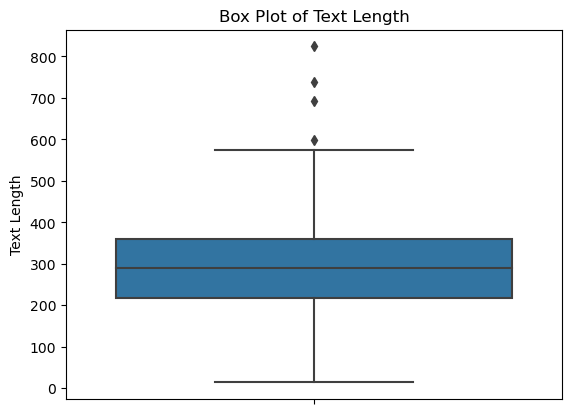

In [5]:
df['text_length'] = df['description'].apply(lambda x: len(x))
sns.boxplot(data=df, y='text_length')
plt.ylabel('Text Length')
plt.title('Box Plot of Text Length')
plt.show()

<Axes: ylabel='Frequency'>

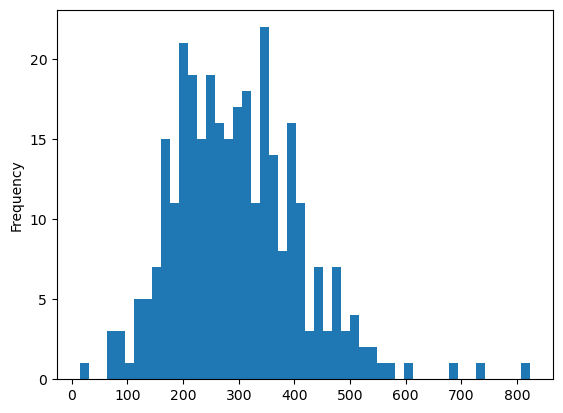

In [6]:
df['text_length'].plot(kind='hist', bins=50)

In [7]:
df['address'].value_counts()

Cairo         120
Red Sea        59
Alexandria     49
Aswan          41
Luxor          41
Name: address, dtype: int64

In [8]:
df['address'].unique()

array(['Alexandria', 'Aswan', 'Cairo', 'Luxor', 'Red Sea'], dtype=object)

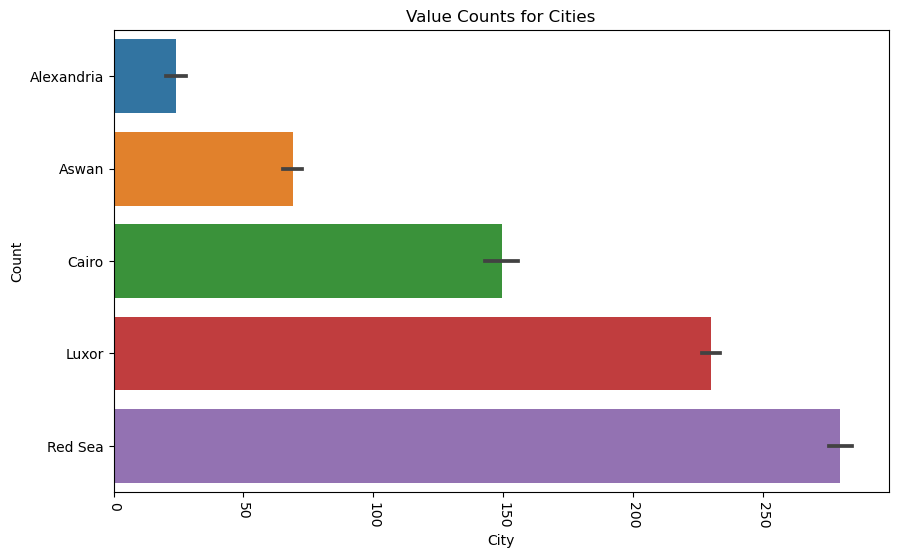

In [9]:
city_counts = df['address']

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=city_counts.index, y=city_counts.values)
plt.title('Value Counts for Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=-90)
plt.show()

In [11]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['description'])

In [13]:
# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

# Save the TF-IDF matrix
with open('tfidf_matrix.pkl', 'wb') as f:
    pickle.dump(tfidf_matrix, f)


In [17]:
with open('data.pkl', 'wb') as f:
    pickle.dump(df, f)

In [14]:
# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [22]:
# Function to get recommendations
def get_recommendations(place_name, df, cosine_sim, top_n=3):
    try:
        idx = df[df['name'] == place_name].index[0]
    except IndexError:
        return pd.DataFrame()  # Return an empty DataFrame if place_name is not found
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]  # Get top 'top_n' similar places
    place_indices = [i[0] for i in sim_scores]
    return df[['name', 'address']].iloc[place_indices]

# Example usage
recommended_places = get_recommendations('Hurghada Grand Aquarium', df, cosine_sim)
print(recommended_places)

                                        name  address
241  Temple of Amun-Re | Precinct of Amun-Re    Luxor
308                  Hurghada Grand Aquarium  Red Sea
299          Marsa Mubark Bay in Marsa Allam  Red Sea
